## Dependencies

In [17]:
%load_ext autoreload
%autoreload 2

# for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# needed to split the data
from sklearn.model_selection import train_test_split

from custom_code.eda import plot_default_rate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constants

In [7]:
data_path = "./data/good-bad-customers-data.csv"
layout_path = "./data/good-bad-customers-layout.csv"
seed = 42

target_column = "f_3pva18m"
id_column = "N_SOLICITUD"
record_date_column = "mes_solicitud"

## Reading the data

In [8]:
df = pd.read_csv(data_path)
df_layout = pd.read_csv(layout_path)

In [9]:
df.head()

,N_SOLICITUD,f_3pva18m,mes_solicitud,edad,suma_saldo_vencido_open,suma_saldo_actual_open,razon_monto_apagar_saldo_actual_open,razon_monto_apagar_limite_credito_open,razon_monto_apagar_saldo_vencido_open,razon_maximo_saldo_maxima_mora_maximo_credito_masalto_open,...,promedio_antiguedad_cuenta_meses_ban_all,max_mop_tc_ult_12m_ban_all,max_mop_tc_ult_18m_ban_all,max_mop_tc_ult_24m_ban_all,num_ctas_antig_12m_ban_all,num_ctas_antig_18m_ban_all,num_ctas_antig_24m_ban_all,n_cons6meses_all,n_cons9meses_all,n_cons12meses_all
0,1.700000e+13,0,2017-11-01,42.0,0.0,479.664785,0.189286,0.081538,NaN,0.000230,...,17.147541,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.800000e+13,0,2018-03-01,64.0,0.0,43501.648160,0.055563,0.009196,NaN,0.001924,...,19.976581,1.0,1.0,1.0,3.0,5.0,6.0,5.0,10.0,12.0
2,1.800001e+13,0,2018-04-01,53.0,0.0,50054.079780,0.087420,0.090331,NaN,0.003588,...,29.840164,1.0,1.0,1.0,3.0,3.0,5.0,1.0,2.0,3.0
3,9.002550e+13,0,2017-07-01,28.0,0.0,18270.098610,0.007623,0.001869,NaN,NaN,...,22.163934,1.0,1.0,1.0,0.0,0.0,2.0,4.0,4.0,6.0
4,9.002560e+13,0,2017-08-01,51.0,0.0,17882.366460,0.000000,0.000000,NaN,0.005317,...,76.319672,1.0,2.0,2.0,0.0,2.0,2.0,6.0,8.0,8.0


In [10]:
# reformating
df.drop(id_column, axis=1 ,inplace=True)
# we are only interested in the respective month
df[record_date_column] = df[record_date_column].astype("string").str.replace("-", "").str[:-2]

### Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 54 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   f_3pva18m                                                      9367 non-null   int64  
 1   mes_solicitud                                                  9367 non-null   string 
 2   edad                                                           9314 non-null   float64
 3   suma_saldo_vencido_open                                        9300 non-null   float64
 4   suma_saldo_actual_open                                         9314 non-null   float64
 5   razon_monto_apagar_saldo_actual_open                           8837 non-null   float64
 6   razon_monto_apagar_limite_credito_open                         9274 non-null   float64
 7   razon_monto_apagar_saldo_vencido_open                       

In [12]:
df.describe()

,f_3pva18m,edad,suma_saldo_vencido_open,suma_saldo_actual_open,razon_monto_apagar_saldo_actual_open,razon_monto_apagar_limite_credito_open,razon_monto_apagar_saldo_vencido_open,razon_maximo_saldo_maxima_mora_maximo_credito_masalto_open,razon_saldo_vencido_saldo_actual_open,suma_ponderada_pagos_12m_open,...,promedio_antiguedad_cuenta_meses_ban_all,max_mop_tc_ult_12m_ban_all,max_mop_tc_ult_18m_ban_all,max_mop_tc_ult_24m_ban_all,num_ctas_antig_12m_ban_all,num_ctas_antig_18m_ban_all,num_ctas_antig_24m_ban_all,n_cons6meses_all,n_cons9meses_all,n_cons12meses_all
count,9367.000000,9314.000000,9300.000000,9.314000e+03,8837.000000,9274.000000,1170.000000,7233.000000,8840.000000,9314.000000,...,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9195.000000,9314.000000,9314.000000,9314.000000
mean,0.234654,41.176294,108.110931,4.398726e+04,0.175916,2.135589,81.577101,0.039617,0.011586,0.567858,...,40.366189,1.242958,1.307885,1.370745,1.199565,1.706471,2.084176,5.146231,6.569895,7.937084
std,0.423805,11.613226,1229.293178,9.649724e+04,5.964184,163.078788,757.073048,0.142902,0.081104,0.227517,...,40.868284,1.115537,1.205246,1.296535,1.583126,1.986050,2.273043,4.581707,5.928192,7.236826
min,0.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,0.000000,2.733831e+03,0.017373,0.009067,1.724164,0.000000,0.000000,0.510075,...,13.032787,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,4.000000
50%,0.000000,40.000000,0.000000,1.372563e+04,0.037038,0.018973,4.134475,0.004347,0.000000,0.531732,...,26.688525,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,6.000000
75%,0.000000,50.000000,0.000000,4.872307e+04,0.072807,0.041546,11.508662,0.023909,0.000000,0.571465,...,53.850117,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,6.000000,8.000000,10.000000
max,1.000000,81.000000,68701.670730,2.651940e+06,551.000000,15484.000000,19979.000000,4.046724,1.000000,10.954451,...,395.573771,9.000000,9.000000,9.000000,18.000000,25.000000,28.000000,98.000000,142.000000,182.000000


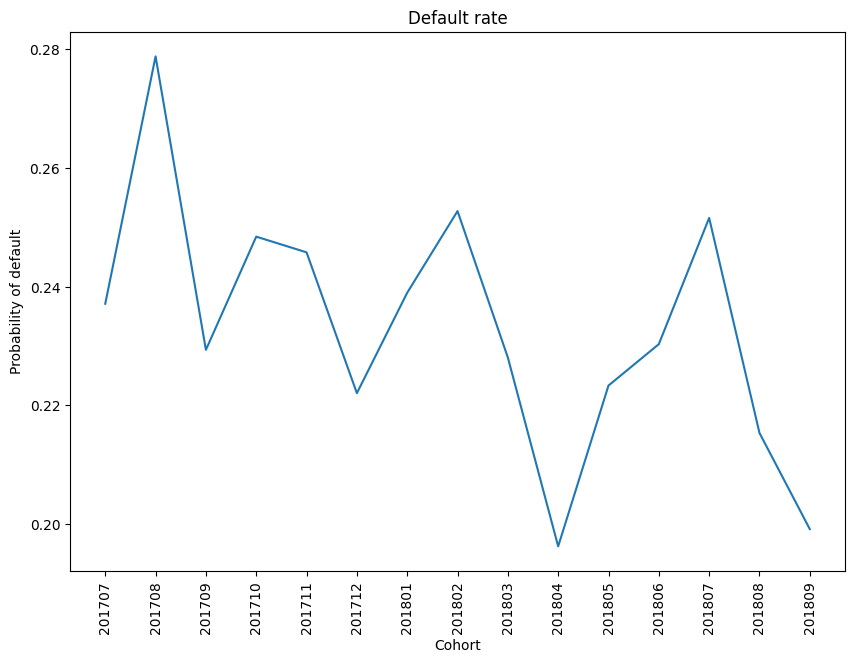

In [20]:
plot_default_rate(df, target_column, record_date_column, (10, 7))